In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sklearn
print("Sklearn verion is {}".format(sklearn.__version__))

Sklearn verion is 0.23.0


In [3]:
df_data = pd.read_csv("feature_dataset/Dataset_an.csv")

In [4]:
feat = []
for i in df_data.columns:
    if i != "GeneID":
        if i != "ps":
            feat.append(i)

In [5]:
def lgb_p(x):
    y = 0
    if x > 0.5:
        y = 1
    return y

# lightgbm

In [6]:
kfold = StratifiedKFold(n_splits=5,random_state=1024, shuffle=False).split(df_data[feat],df_data["ps"])
lgb_answer = []

for fold, (train_idx, valid_idx) in enumerate(kfold):
    df = pd.DataFrame()
    X_train, y_train = df_data[feat].iloc[train_idx], df_data["ps"].iloc[train_idx]
    X_valid, y_valid = df_data[feat].iloc[valid_idx], df_data["ps"].iloc[valid_idx]

    XX_valid,test_X,yy_valid,test_y = train_test_split(X_valid,y_valid,
                                                     test_size=0.5,random_state=2020)
    
    train_lgb = lgb.Dataset(data=X_train,label=y_train)
    test_lgb = lgb.Dataset(data=test_X,label=test_y)
    valid_lgb = lgb.Dataset(data=XX_valid,label=yy_valid)
    param = {'num_leaves':8, 'num_trees':8, 'objective':'binary',
             'boost_from_average': True,'force_row_wise':True,'metric':'auc',
            'data_random_seed': 2020,'seed': 2020}
    bst = lgb.train(param, train_lgb, valid_sets=[valid_lgb])
    y_pred = bst.predict(test_X)
    df["lgb"] = y_pred
    df["x"] = df["lgb"].apply(lambda x:lgb_p(x))
    fpr, tpr, thresholds = metrics.roc_curve(test_y,list(df["x"]))
    test_auc = metrics.auc(fpr, tpr)
    lgb_answer.append(test_auc)
    print("lgb_answer",test_auc)

[LightGBM] [Info] Number of positive: 176, number of negative: 324
[LightGBM] [Info] Total Bins 54942
[LightGBM] [Info] Number of data points in the train set: 500, number of used features: 331
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.352000 -> initscore=-0.610260
[LightGBM] [Info] Start training from score -0.610260
[1]	valid_0's auc: 0.950595
[2]	valid_0's auc: 0.981548
[3]	valid_0's auc: 0.980357
[4]	valid_0's auc: 0.980952
[5]	valid_0's auc: 0.985714
[6]	valid_0's auc: 0.984524
[7]	valid_0's auc: 0.982143
[8]	valid_0's auc: 0.984524
lgb_answer 0.9166666666666667
[LightGBM] [Info] Number of positive: 176, number of negative: 324
[LightGBM] [Info] Total Bins 54905
[LightGBM] [Info] Number of data points in the train set: 500, number of used features: 331
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.352000 -> initscore=-0.610260
[LightGBM] [Info] Start training from score -0.610260
[1]	valid_0's auc: 0.986905
[2]	valid_0's auc: 0.98631
[3]	valid_0's auc: 0.978571
[4]	val

# Xgb

In [7]:
kfold = StratifiedKFold(n_splits=5, random_state=1024, shuffle=False).split(df_data[feat],df_data["ps"])
xgb_answer = []
for fold, (train_idx, valid_idx) in enumerate(kfold):
    X_train, y_train = df_data[feat].iloc[train_idx], df_data["ps"].iloc[train_idx]
    X_valid, y_valid = df_data[feat].iloc[valid_idx], df_data["ps"].iloc[valid_idx]

    XX_valid,test_X,yy_valid,test_y = train_test_split(X_valid,y_valid,
                                                     test_size=0.5,random_state=2020)
    model = XGBClassifier(max_depth=8, silent=0,booster='gbtree',
                          random_state=2020)
    eval_set = [(XX_valid,yy_valid)]
    model.fit(X_train,y_train,early_stopping_rounds=5,
              eval_metric="auc",eval_set=eval_set)
    y_pred = model.predict(test_X)
    fpr, tpr, thresholds = metrics.roc_curve(test_y,y_pred)
    test_auc = metrics.auc(fpr, tpr)
    xgb_answer.append(test_auc)
    print(test_auc)

[22:51:01] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.93571
[1]	validation_0-auc:0.95476
[2]	validation_0-auc:0.95774
[3]	validation_0-auc:0.95655
[4]	validation_0-auc:0.96012
[5]	validation_0-auc:0.98691
[6]	validation_0-auc:0.98691
[7]	validation_0-auc:0.98809
[8]	validation_0-auc:0.98809
[9]	validation_0-auc:0.98809
[10]	validation_0-auc:0.98929
[11]	validation_0-auc:0.98809
[12]	validation_0-auc:0.99048
[13]	validation_0-auc:0.99048
[14]	validation_0-auc:0.99048
[15]	validation_0-auc:0.99048
[16]	validation_0-auc:0.99286
[17]	validation_0-auc:0.99286
[18]	validation_0-auc:0.99167
[19]	validation_0-auc:0.99286
[20]	validation_0-auc:0.99286
0.9166666666666667
[22:

# Catboost

In [8]:
kfold = StratifiedKFold(n_splits=5, random_state=1024, shuffle=False).split(df_data[feat],df_data["ps"])
catboost_answer = []
for fold, (train_idx, valid_idx) in enumerate(kfold):
    X_train, y_train = df_data[feat].iloc[train_idx], df_data["ps"].iloc[train_idx]
    X_valid, y_valid = df_data[feat].iloc[valid_idx], df_data["ps"].iloc[valid_idx]

    XX_valid,test_X,yy_valid,test_y = train_test_split(X_valid,y_valid,
                                                     test_size=0.5,random_state=2020)

    model=CatBoostClassifier(
                loss_function="Logloss",
                eval_metric="AUC",
                task_type="CPU",
                learning_rate=0.1,
                iterations=2,
                random_seed=2020,
                od_type="Iter",
                depth=8,
                early_stopping_rounds=500

            )

    clf = model.fit(X_train,y_train, eval_set=(XX_valid,yy_valid),verbose=500)
    predict_prob_y = clf.predict(test_X)
    fpr, tpr, thresholds = metrics.roc_curve(test_y,predict_prob_y)
    test_auc = metrics.auc(fpr, tpr)
    catboost_answer.append(test_auc)
    print(test_auc)

0:	test: 0.9773810	best: 0.9773810 (0)	total: 78.2ms	remaining: 78.2ms
1:	test: 0.9708333	best: 0.9773810 (0)	total: 107ms	remaining: 0us

bestTest = 0.9773809524
bestIteration = 0

Shrink model to first 1 iterations.
0.8541666666666667
0:	test: 0.9553571	best: 0.9553571 (0)	total: 29.4ms	remaining: 29.4ms
1:	test: 0.9625000	best: 0.9625000 (1)	total: 58.9ms	remaining: 0us

bestTest = 0.9625
bestIteration = 1

0.8830128205128204
0:	test: 0.9345238	best: 0.9345238 (0)	total: 28.5ms	remaining: 28.5ms
1:	test: 0.9714286	best: 0.9714286 (1)	total: 57.5ms	remaining: 0us

bestTest = 0.9714285714
bestIteration = 1

0.9038461538461539
0:	test: 0.9714286	best: 0.9714286 (0)	total: 28.6ms	remaining: 28.6ms
1:	test: 0.9898810	best: 0.9898810 (1)	total: 57.6ms	remaining: 0us

bestTest = 0.9898809524
bestIteration = 1

0.9407051282051283
0:	test: 0.9559524	best: 0.9559524 (0)	total: 28.7ms	remaining: 28.7ms
1:	test: 0.9821429	best: 0.9821429 (1)	total: 57.7ms	remaining: 0us

bestTest = 0.9821428571

# Random Forests

In [9]:
kfold = StratifiedKFold(n_splits=5, random_state=1024, shuffle=False).split(df_data[feat],df_data["ps"])
RandomForest_answer = []
for fold, (train_idx, valid_idx) in enumerate(kfold):
    X_train, y_train = df_data[feat].iloc[train_idx], df_data["ps"].iloc[train_idx]
    X_valid, y_valid = df_data[feat].iloc[valid_idx], df_data["ps"].iloc[valid_idx]

    XX_valid,test_X,yy_valid,test_y = train_test_split(X_valid,y_valid,
                                                     test_size=0.5,random_state=2020)

    
    model = RandomForestClassifier(n_estimators=100, random_state=2020)

    clf = model.fit(X_train,y_train)
    predict_prob_y = clf.predict(test_X)
    fpr, tpr, thresholds = metrics.roc_curve(test_y,predict_prob_y)
    test_auc = metrics.auc(fpr, tpr)
    RandomForest_answer.append(test_auc)
    print(test_auc)

0.9375
0.9583333333333333
0.9246794871794871
0.9407051282051283
0.9615384615384616


# vote

In [11]:
kfold = StratifiedKFold(n_splits=5, random_state=1024, shuffle=False).split(df_data[feat],df_data["ps"])
vote_answer = []
for fold, (train_idx, valid_idx) in enumerate(kfold):
    df11 = pd.DataFrame()
    X_train, y_train = df_data[feat].iloc[train_idx], df_data["ps"].iloc[train_idx]
    X_valid, y_valid = df_data[feat].iloc[valid_idx], df_data["ps"].iloc[valid_idx]

    XX_valid,test_X,yy_valid,test_y = train_test_split(X_valid,y_valid,
                                                     test_size=0.5,random_state=2020)
    rf = RandomForestClassifier(n_estimators=100, random_state=2020)

    clf = rf.fit(X_train,y_train)
    rf_y = clf.predict(test_X)
    
    model=CatBoostClassifier(
                loss_function="Logloss",
                eval_metric="AUC",
                task_type="CPU",
                learning_rate=0.1,
                iterations=2,
                random_seed=2020,
                od_type="Iter",
                depth=8,
                early_stopping_rounds=500)

    clf = model.fit(X_train,y_train, eval_set=(XX_valid,yy_valid),verbose=500)
    cat_y = clf.predict(test_X)
    
    model = XGBClassifier(max_depth=8, silent=0,booster='gbtree',
                          random_state=2020)
    eval_set = [(XX_valid,yy_valid)]
    model.fit(X_train,y_train,early_stopping_rounds=5,
              eval_metric="auc",eval_set=eval_set)
    xgb_y = model.predict(test_X)
    
    train_lgb = lgb.Dataset(data=X_train,label=y_train)
    test_lgb = lgb.Dataset(data=test_X,label=test_y)
    valid_lgb = lgb.Dataset(data=XX_valid,label=yy_valid)
    param = {'num_leaves':8, 'num_trees':8, 'objective':'binary',
             'boost_from_average': True,'force_row_wise':True,'metric':'auc',
            'data_random_seed': 2020,'seed': 2020}
    bst = lgb.train(param, train_lgb, valid_sets=[valid_lgb])
    y_pred = bst.predict(test_X)
    df11["lgb"] = y_pred
    lgb_y = df11["lgb"].apply(lambda x:lgb_p(x))
    
    def vote(x):
            y = 0
            if abs(x) > 2:
                y = 1
            return y
        
    df_cat = pd.DataFrame(cat_y)#2分
    df_xgb = pd.DataFrame(xgb_y)#1分
    df_rf = pd.DataFrame(rf_y)#1.5分
    df_lgb = pd.DataFrame(list(lgb_y))
    df = pd.DataFrame(df_lgb[0]*1 + df_xgb[0]*2 + df_rf[0]*1 + df_cat[0]*1)
    df[1] = df[0].apply(lambda x : vote(x))
    fpr, tpr, thresholds = metrics.roc_curve(test_y,df[1])
    test_auc = metrics.auc(fpr, tpr)
    vote_answer.append(test_auc)
    print("aaaaa:",test_auc)

0:	test: 0.9773810	best: 0.9773810 (0)	total: 27.8ms	remaining: 27.8ms
1:	test: 0.9708333	best: 0.9773810 (0)	total: 56.5ms	remaining: 0us

bestTest = 0.9773809524
bestIteration = 0

Shrink model to first 1 iterations.
[22:51:23] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.93571
[1]	validation_0-auc:0.95476
[2]	validation_0-auc:0.95774
[3]	validation_0-auc:0.95655
[4]	validation_0-auc:0.96012
[5]	validation_0-auc:0.98691
[6]	validation_0-auc:0.98691
[7]	validation_0-auc:0.98809
[8]	validation_0-auc:0.98809
[9]	validation_0-auc:0.98809
[10]	validation_0-auc:0.98929
[11]	validation_0-auc:0.98809
[12]	validation_0-auc:0.99048
[13]	validation_0-auc:0.99048
[14]	validatio

# 可视化

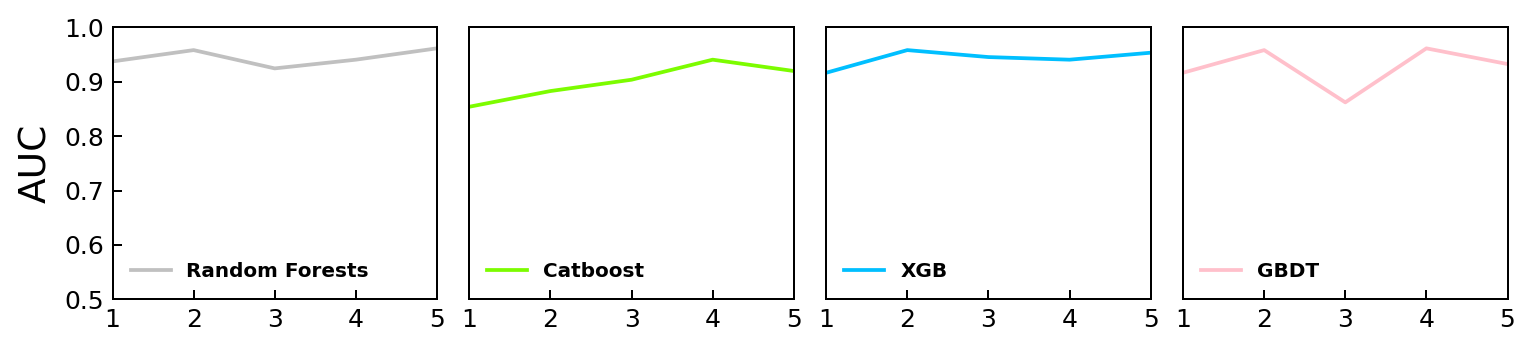

In [12]:
fig = plt.figure(figsize=(10,2),dpi=180)
# 创建子图1
x=[1,2,3,4,5]
sub1 = fig.add_subplot(1,4,1)
plt.ylabel("AUC",{"size":15})
plt.tick_params(direction='in')
plt.ylim((0.5, 1))
plt.xlim((1, 5))
sub1.plot(x,RandomForest_answer,label ="Random Forests", color='silver')
plt.legend(loc='lower left',fontsize='small',frameon=False,prop={"size":8,'weight':"bold"})
 
#创建子图2
sub3 = fig.add_subplot(1,4,2)
plt.ylim((0.5, 1))
plt.xlim((1, 5))
plt.tick_params(direction='in')
plt.yticks([])  #去掉y轴
sub3.plot(x,catboost_answer,label ="Catboost", color='lawngreen')
plt.legend(loc='lower left',fontsize='small',frameon=False,prop={"size":8,'weight':"bold"})
 
#创建子图3
sub4 = fig.add_subplot(1,4,3)
plt.ylim((0.5, 1))
plt.xlim((1, 5))
plt.tick_params(direction='in')
plt.yticks([])  #去掉y轴
sub4.plot(x,xgb_answer,label ="XGB", color='deepskyblue')
plt.legend(loc='lower left',fontsize='small',frameon=False,prop={"size":8,'weight':"bold"})

#创建子图4
sub5 = fig.add_subplot(1,4,4)
plt.yticks([])  #去掉y轴
plt.ylim((0.5, 1))
plt.xlim((1, 5))
plt.tick_params(direction='in')
sub5.plot(x,lgb_answer,label ="GBDT", color='pink')
plt.legend(loc='lower left',fontsize='small',frameon=False,prop={"size":8,'weight':"bold"})

plt.subplots_adjust(hspace=0.4,wspace=0.1)
plt.show()

In [13]:
RandomForest_answer

[0.9375,
 0.9583333333333333,
 0.9246794871794871,
 0.9407051282051283,
 0.9615384615384616]

In [14]:
catboost_answer

[0.8541666666666667,
 0.8830128205128204,
 0.9038461538461539,
 0.9407051282051283,
 0.9198717948717948]

In [15]:
xgb_answer

[0.9166666666666667,
 0.9583333333333333,
 0.9455128205128204,
 0.9407051282051283,
 0.9535256410256411]

In [16]:
lgb_answer

[0.9166666666666667,
 0.9583333333333333,
 0.8621794871794871,
 0.9615384615384616,
 0.9326923076923076]

In [17]:
import numpy as np
np.mean(RandomForest_answer)

0.9445512820512819

In [18]:
np.mean(lgb_answer)

0.9262820512820513

In [19]:
np.mean(vote_answer)

0.9471153846153847

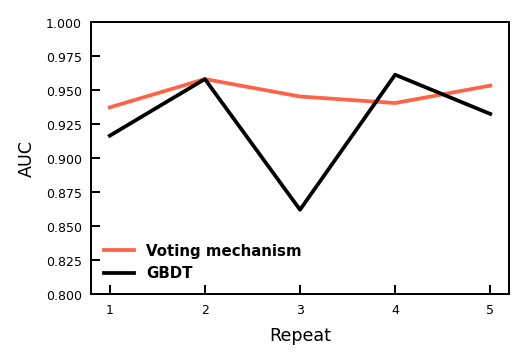

In [21]:
fig = plt.figure(figsize=(3,2),dpi=180)
plt.ylim((0.8, 1))
plt.xticks(range(1,6))
plt.tick_params(labelsize = 5)
plt.ylabel("AUC", fontsize=7)
plt.xlabel("Repeat", fontsize=7)
plt.tick_params(direction='in')
plt.plot(x,vote_answer,label ="Voting mechanism", color='tomato')
plt.legend(loc='lower left',fontsize='x-small',frameon=False,prop={"size":6,'weight':"bold"})
plt.plot(x,lgb_answer,label ="GBDT", color='black')
plt.legend(loc='lower left',fontsize='x-small',frameon=False,prop={"size":6,'weight':"bold"})


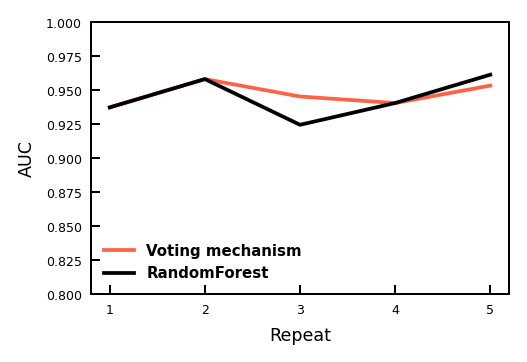

In [22]:
fig = plt.figure(figsize=(3,2),dpi=180)
plt.ylim((0.8, 1))
plt.xticks(range(1,6))
plt.tick_params(labelsize = 5)
plt.ylabel("AUC", fontsize=7)
plt.xlabel("Repeat", fontsize=7)
plt.tick_params(direction='in')
plt.plot(x,vote_answer,label ="Voting mechanism", color='tomato')
plt.legend(loc='lower left',fontsize='x-small',frameon=False,prop={"size":6,'weight':"bold"})
plt.plot(x,RandomForest_answer,label ="RandomForest", color='black')
plt.legend(loc='lower left',fontsize='x-small',frameon=False,prop={"size":6,'weight':"bold"})

In [23]:
vote_answer

[0.9375,
 0.9583333333333333,
 0.9455128205128204,
 0.9407051282051283,
 0.9535256410256411]

In [24]:
np.mean(vote_answer)

0.9471153846153847

In [25]:
RandomForest_answer

[0.9375,
 0.9583333333333333,
 0.9246794871794871,
 0.9407051282051283,
 0.9615384615384616]

In [26]:
catboost_answer

[0.8541666666666667,
 0.8830128205128204,
 0.9038461538461539,
 0.9407051282051283,
 0.9198717948717948]

In [27]:
xgb_answer

[0.9166666666666667,
 0.9583333333333333,
 0.9455128205128204,
 0.9407051282051283,
 0.9535256410256411]

In [28]:
lgb_answer

[0.9166666666666667,
 0.9583333333333333,
 0.8621794871794871,
 0.9615384615384616,
 0.9326923076923076]

# ATP4,bsd2,cps2,hcf136,pet2,pyg56 vs all

In [29]:
df_ATP4 = pd.read_csv("feature_dataset/ATP4_dataset.csv")
df_bsd2 = pd.read_csv("feature_dataset/bsd2_dataset.csv")
df_cps2 = pd.read_csv("feature_dataset/cps2_dataset.csv")
df_hcf136 = pd.read_csv("feature_dataset/hcf136_dataset.csv")
df_pet2 = pd.read_csv("feature_dataset/pet2_dataset.csv")
df_pyg56 = pd.read_csv("feature_dataset/pyg56_dataset.csv")

In [30]:
feat = []
for i in df_ATP4.columns:
    if i != "GeneID":
        if i != "ps":
            feat.append(i)

In [31]:
kfold = StratifiedKFold(n_splits=5, random_state=1024, shuffle=False).split(df_ATP4[feat],df_ATP4["ps"])
atp4_vote_answer = []
for fold, (train_idx, valid_idx) in enumerate(kfold):
    df11 = pd.DataFrame()
    X_train, y_train = df_ATP4[feat].iloc[train_idx], df_ATP4["ps"].iloc[train_idx]
    X_valid, y_valid = df_ATP4[feat].iloc[valid_idx], df_ATP4["ps"].iloc[valid_idx]

    XX_valid,test_X,yy_valid,test_y = train_test_split(X_valid,y_valid,
                                                     test_size=0.5,random_state=2020)
    rf = RandomForestClassifier(n_estimators=100, random_state=2020)

    clf = rf.fit(X_train,y_train)
    rf_y = clf.predict(test_X)
    
    model=CatBoostClassifier(
                loss_function="Logloss",
                eval_metric="AUC",
                task_type="CPU",
                learning_rate=0.1,
                iterations=2,
                random_seed=2020,
                od_type="Iter",
                depth=8,
                early_stopping_rounds=500)

    clf = model.fit(X_train,y_train, eval_set=(XX_valid,yy_valid),verbose=500)
    cat_y = clf.predict(test_X)
    
    model = XGBClassifier(max_depth=8, silent=0,booster='gbtree',
                          random_state=2020)
    eval_set = [(XX_valid,yy_valid)]
    model.fit(X_train,y_train,early_stopping_rounds=5,
              eval_metric="auc",eval_set=eval_set)
    xgb_y = model.predict(test_X)
    
    train_lgb = lgb.Dataset(data=X_train,label=y_train)
    test_lgb = lgb.Dataset(data=test_X,label=test_y)
    valid_lgb = lgb.Dataset(data=XX_valid,label=yy_valid)
    param = {'num_leaves':8, 'num_trees':8, 'objective':'binary',
             'boost_from_average': True,'force_row_wise':True,'metric':'auc',
            'data_random_seed': 2020,'seed': 2020}
    bst = lgb.train(param, train_lgb, valid_sets=[valid_lgb])
    y_pred = bst.predict(test_X)
    df11["lgb"] = y_pred
    lgb_y = df11["lgb"].apply(lambda x:lgb_p(x))
    
    def vote(x):
            y = 0
            if abs(x) > 2:
                y = 1
            return y
        
    df_cat = pd.DataFrame(cat_y)#2分
    df_xgb = pd.DataFrame(xgb_y)#1分
    df_rf = pd.DataFrame(rf_y)#1.5分
    df_lgb = pd.DataFrame(list(lgb_y))
    df = pd.DataFrame(df_lgb[0]*1 + df_xgb[0]*1 + df_rf[0]*1 + df_cat[0]*1)
    df[1] = df[0].apply(lambda x : vote(x))
    fpr, tpr, thresholds = metrics.roc_curve(test_y,df[1])
    test_auc = metrics.auc(fpr, tpr)
    atp4_vote_answer.append(test_auc)
    print("aaaaa:",test_auc)

0:	test: 0.9065249	best: 0.9065249 (0)	total: 6.34ms	remaining: 6.34ms
1:	test: 0.9076246	best: 0.9076246 (1)	total: 12.6ms	remaining: 0us

bestTest = 0.9076246334
bestIteration = 1

[22:52:29] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.89003
[1]	validation_0-auc:0.91276
[2]	validation_0-auc:0.89846
[3]	validation_0-auc:0.92485
[4]	validation_0-auc:0.92229
[5]	validation_0-auc:0.91422
[6]	validation_0-auc:0.92302
[7]	validation_0-auc:0.91789
[8]	validation_0-auc:0.91862
[LightGBM] [Info] Number of positive: 252, number of negative: 344
[LightGBM] [Info] Total Bins 11125
[LightGBM] [Info] Number of data points in the train set: 596, number of used features: 56
[Light

In [32]:
feat = []
for i in df_bsd2.columns:
    if i != "GeneID":
        if i != "ps":
            feat.append(i)

kfold = StratifiedKFold(n_splits=5, random_state=1024, shuffle=False).split(df_bsd2[feat],df_bsd2["ps"])
bsd2_vote_answer = []
for fold, (train_idx, valid_idx) in enumerate(kfold):
    df11 = pd.DataFrame()
    X_train, y_train = df_bsd2[feat].iloc[train_idx], df_bsd2["ps"].iloc[train_idx]
    X_valid, y_valid = df_bsd2[feat].iloc[valid_idx], df_bsd2["ps"].iloc[valid_idx]

    XX_valid,test_X,yy_valid,test_y = train_test_split(X_valid,y_valid,
                                                     test_size=0.5,random_state=2020)
    rf = RandomForestClassifier(n_estimators=100, random_state=2020)

    clf = rf.fit(X_train,y_train)
    rf_y = clf.predict(test_X)
    
    model=CatBoostClassifier(
                loss_function="Logloss",
                eval_metric="AUC",
                task_type="CPU",
                learning_rate=0.1,
                iterations=2,
                random_seed=2020,
                od_type="Iter",
                depth=8,
                early_stopping_rounds=500)

    clf = model.fit(X_train,y_train, eval_set=(XX_valid,yy_valid),verbose=500)
    cat_y = clf.predict(test_X)
    
    model = XGBClassifier(max_depth=8, silent=0,booster='gbtree',
                          random_state=2020)
    eval_set = [(XX_valid,yy_valid)]
    model.fit(X_train,y_train,early_stopping_rounds=5,
              eval_metric="auc",eval_set=eval_set)
    xgb_y = model.predict(test_X)
    
    train_lgb = lgb.Dataset(data=X_train,label=y_train)
    test_lgb = lgb.Dataset(data=test_X,label=test_y)
    valid_lgb = lgb.Dataset(data=XX_valid,label=yy_valid)
    param = {'num_leaves':8, 'num_trees':8, 'objective':'binary',
             'boost_from_average': True,'force_row_wise':True,'metric':'auc',
            'data_random_seed': 2020,'seed': 2020}
    bst = lgb.train(param, train_lgb, valid_sets=[valid_lgb])
    y_pred = bst.predict(test_X)
    df11["lgb"] = y_pred
    lgb_y = df11["lgb"].apply(lambda x:lgb_p(x))
    
    def vote(x):
            y = 0
            if abs(x) > 2:
                y = 1
            return y
        
    df_cat = pd.DataFrame(cat_y)#2分
    df_xgb = pd.DataFrame(xgb_y)#1分
    df_rf = pd.DataFrame(rf_y)#1.5分
    df_lgb = pd.DataFrame(list(lgb_y))
    df = pd.DataFrame(df_lgb[0]*1 + df_xgb[0]*2 + df_rf[0]*1 + df_cat[0]*1)
    df[1] = df[0].apply(lambda x : vote(x))
    fpr, tpr, thresholds = metrics.roc_curve(test_y,df[1])
    test_auc = metrics.auc(fpr, tpr)
    bsd2_vote_answer.append(test_auc)
    print("aaaaa:",test_auc)

0:	test: 0.8538721	best: 0.8538721 (0)	total: 7.84ms	remaining: 7.84ms
1:	test: 0.8764310	best: 0.8764310 (1)	total: 14.1ms	remaining: 0us

bestTest = 0.8764309764
bestIteration = 1

[22:52:35] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.86869
[1]	validation_0-auc:0.87374
[2]	validation_0-auc:0.90236
[3]	validation_0-auc:0.91246
[4]	validation_0-auc:0.91077
[5]	validation_0-auc:0.90404
[6]	validation_0-auc:0.89428
[7]	validation_0-auc:0.89428
[8]	validation_0-auc:0.89764
[LightGBM] [Info] Number of positive: 257, number of negative: 364
[LightGBM] [Info] Total Bins 11460
[LightGBM] [Info] Number of data points in the train set: 621, number of used features: 56
[Light

In [33]:
feat = []
for i in df_cps2.columns:
    if i != "GeneID":
        if i != "ps":
            feat.append(i)

kfold = StratifiedKFold(n_splits=5, random_state=1024, shuffle=False).split(df_cps2[feat],df_cps2["ps"])
cps2_vote_answer = []
for fold, (train_idx, valid_idx) in enumerate(kfold):
    df11 = pd.DataFrame()
    X_train, y_train = df_cps2[feat].iloc[train_idx], df_cps2["ps"].iloc[train_idx]
    X_valid, y_valid = df_cps2[feat].iloc[valid_idx], df_cps2["ps"].iloc[valid_idx]

    XX_valid,test_X,yy_valid,test_y = train_test_split(X_valid,y_valid,
                                                     test_size=0.5,random_state=2020)
    rf = RandomForestClassifier(n_estimators=100, random_state=2020)

    clf = rf.fit(X_train,y_train)
    rf_y = clf.predict(test_X)
    
    model=CatBoostClassifier(
                loss_function="Logloss",
                eval_metric="AUC",
                task_type="CPU",
                learning_rate=0.1,
                iterations=2,
                random_seed=2020,
                od_type="Iter",
                depth=8,
                early_stopping_rounds=500)

    clf = model.fit(X_train,y_train, eval_set=(XX_valid,yy_valid),verbose=500)
    cat_y = clf.predict(test_X)
    
    model = XGBClassifier(max_depth=8, silent=0,booster='gbtree',
                          random_state=2020)
    eval_set = [(XX_valid,yy_valid)]
    model.fit(X_train,y_train,early_stopping_rounds=5,
              eval_metric="auc",eval_set=eval_set)
    xgb_y = model.predict(test_X)
    
    train_lgb = lgb.Dataset(data=X_train,label=y_train)
    test_lgb = lgb.Dataset(data=test_X,label=test_y)
    valid_lgb = lgb.Dataset(data=XX_valid,label=yy_valid)
    param = {'num_leaves':8, 'num_trees':8, 'objective':'binary',
             'boost_from_average': True,'force_row_wise':True,'metric':'auc',
            'data_random_seed': 2020,'seed': 2020}
    bst = lgb.train(param, train_lgb, valid_sets=[valid_lgb])
    y_pred = bst.predict(test_X)
    df11["lgb"] = y_pred
    lgb_y = df11["lgb"].apply(lambda x:lgb_p(x))
    
    def vote(x):
            y = 0
            if abs(x) > 2:
                y = 1
            return y
        
    df_cat = pd.DataFrame(cat_y)#2分
    df_xgb = pd.DataFrame(xgb_y)#1分
    df_rf = pd.DataFrame(rf_y)#1.5分
    df_lgb = pd.DataFrame(list(lgb_y))
    df = pd.DataFrame(df_lgb[0]*1 + df_xgb[0]*2 + df_rf[0]*1 + df_cat[0]*1)
    df[1] = df[0].apply(lambda x : vote(x))
    fpr, tpr, thresholds = metrics.roc_curve(test_y,df[1])
    test_auc = metrics.auc(fpr, tpr)
    cps2_vote_answer.append(test_auc)
    print("aaaaa:",test_auc)

0:	test: 0.8053156	best: 0.8053156 (0)	total: 6.08ms	remaining: 6.08ms
1:	test: 0.8315615	best: 0.8315615 (1)	total: 12.3ms	remaining: 0us

bestTest = 0.8315614618
bestIteration = 1

[22:52:39] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.82392
[1]	validation_0-auc:0.83721
[2]	validation_0-auc:0.84352
[3]	validation_0-auc:0.84917
[4]	validation_0-auc:0.87110
[5]	validation_0-auc:0.86578
[6]	validation_0-auc:0.86512
[7]	validation_0-auc:0.86645
[8]	validation_0-auc:0.86645
[9]	validation_0-auc:0.87043
[LightGBM] [Info] Number of positive: 260, number of negative: 368
[LightGBM] [Info] Total Bins 11233
[LightGBM] [Info] Number of data points in the train set: 628, numbe

In [34]:
feat = []
for i in df_hcf136.columns:
    if i != "GeneID":
        if i != "ps":
            feat.append(i)

kfold = StratifiedKFold(n_splits=5, random_state=1024, shuffle=False).split(df_hcf136[feat],df_hcf136["ps"])
hcf136_vote_answer = []
for fold, (train_idx, valid_idx) in enumerate(kfold):
    df11 = pd.DataFrame()
    X_train, y_train = df_hcf136[feat].iloc[train_idx], df_hcf136["ps"].iloc[train_idx]
    X_valid, y_valid = df_hcf136[feat].iloc[valid_idx], df_hcf136["ps"].iloc[valid_idx]

    XX_valid,test_X,yy_valid,test_y = train_test_split(X_valid,y_valid,
                                                     test_size=0.5,random_state=2020)
    rf = RandomForestClassifier(n_estimators=100, random_state=2020)

    clf = rf.fit(X_train,y_train)
    rf_y = clf.predict(test_X)
    
    model=CatBoostClassifier(
                loss_function="Logloss",
                eval_metric="AUC",
                task_type="CPU",
                learning_rate=0.1,
                iterations=2,
                random_seed=2020,
                od_type="Iter",
                depth=8,
                early_stopping_rounds=500)

    clf = model.fit(X_train,y_train, eval_set=(XX_valid,yy_valid),verbose=500)
    cat_y = clf.predict(test_X)
    
    model = XGBClassifier(max_depth=8, silent=0,booster='gbtree',
                          random_state=2020)
    eval_set = [(XX_valid,yy_valid)]
    model.fit(X_train,y_train,early_stopping_rounds=5,
              eval_metric="auc",eval_set=eval_set)
    xgb_y = model.predict(test_X)
    
    train_lgb = lgb.Dataset(data=X_train,label=y_train)
    test_lgb = lgb.Dataset(data=test_X,label=test_y)
    valid_lgb = lgb.Dataset(data=XX_valid,label=yy_valid)
    param = {'num_leaves':8, 'num_trees':8, 'objective':'binary',
             'boost_from_average': True,'force_row_wise':True,'metric':'auc',
            'data_random_seed': 2020,'seed': 2020}
    bst = lgb.train(param, train_lgb, valid_sets=[valid_lgb])
    y_pred = bst.predict(test_X)
    df11["lgb"] = y_pred
    lgb_y = df11["lgb"].apply(lambda x:lgb_p(x))
    
    def vote(x):
            y = 0
            if abs(x) > 2:
                y = 1
            return y
        
    df_cat = pd.DataFrame(cat_y)#2分
    df_xgb = pd.DataFrame(xgb_y)#1分
    df_rf = pd.DataFrame(rf_y)#1.5分
    df_lgb = pd.DataFrame(list(lgb_y))
    df = pd.DataFrame(df_lgb[0]*1 + df_xgb[0]*2 + df_rf[0]*1 + df_cat[0]*1)
    df[1] = df[0].apply(lambda x : vote(x))
    fpr, tpr, thresholds = metrics.roc_curve(test_y,df[1])
    test_auc = metrics.auc(fpr, tpr)
    hcf136_vote_answer.append(test_auc)
    print("aaaaa:",test_auc)

0:	test: 0.8302945	best: 0.8302945 (0)	total: 6.86ms	remaining: 6.86ms
1:	test: 0.8555400	best: 0.8555400 (1)	total: 13.4ms	remaining: 0us

bestTest = 0.8555399719
bestIteration = 1

[22:52:43] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.84818
[1]	validation_0-auc:0.85344
[2]	validation_0-auc:0.86255
[3]	validation_0-auc:0.84677
[4]	validation_0-auc:0.86010
[5]	validation_0-auc:0.88043
[6]	validation_0-auc:0.89341
[7]	validation_0-auc:0.88640
[8]	validation_0-auc:0.89621
[9]	validation_0-auc:0.89271
[10]	validation_0-auc:0.89691
[11]	validation_0-auc:0.89551
[12]	validation_0-auc:0.90182
[13]	validation_0-auc:0.90323
[14]	validation_0-auc:0.90673
[15]	validation_0-au

In [35]:
feat = []
for i in df_pet2.columns:
    if i != "GeneID":
        if i != "ps":
            feat.append(i)

kfold = StratifiedKFold(n_splits=5, random_state=1024, shuffle=False).split(df_pet2[feat],df_pet2["ps"])
pet2_vote_answer = []
for fold, (train_idx, valid_idx) in enumerate(kfold):
    df11 = pd.DataFrame()
    X_train, y_train = df_pet2[feat].iloc[train_idx], df_pet2["ps"].iloc[train_idx]
    X_valid, y_valid = df_pet2[feat].iloc[valid_idx], df_pet2["ps"].iloc[valid_idx]

    XX_valid,test_X,yy_valid,test_y = train_test_split(X_valid,y_valid,
                                                     test_size=0.5,random_state=2020)
    rf = RandomForestClassifier(n_estimators=100, random_state=2020)

    clf = rf.fit(X_train,y_train)
    rf_y = clf.predict(test_X)
    
    model=CatBoostClassifier(
                loss_function="Logloss",
                eval_metric="AUC",
                task_type="CPU",
                learning_rate=0.1,
                iterations=2,
                random_seed=2020,
                od_type="Iter",
                depth=8,
                early_stopping_rounds=500)

    clf = model.fit(X_train,y_train, eval_set=(XX_valid,yy_valid),verbose=500)
    cat_y = clf.predict(test_X)
    
    model = XGBClassifier(max_depth=8, silent=0,booster='gbtree',
                          random_state=2020)
    eval_set = [(XX_valid,yy_valid)]
    model.fit(X_train,y_train,early_stopping_rounds=5,
              eval_metric="auc",eval_set=eval_set)
    xgb_y = model.predict(test_X)
    
    train_lgb = lgb.Dataset(data=X_train,label=y_train)
    test_lgb = lgb.Dataset(data=test_X,label=test_y)
    valid_lgb = lgb.Dataset(data=XX_valid,label=yy_valid)
    param = {'num_leaves':8, 'num_trees':8, 'objective':'binary',
             'boost_from_average': True,'force_row_wise':True,'metric':'auc',
            'data_random_seed': 2020,'seed': 2020}
    bst = lgb.train(param, train_lgb, valid_sets=[valid_lgb])
    y_pred = bst.predict(test_X)
    df11["lgb"] = y_pred
    lgb_y = df11["lgb"].apply(lambda x:lgb_p(x))
    
    def vote(x):
            y = 0
            if abs(x) > 2:
                y = 1
            return y
        
    df_cat = pd.DataFrame(cat_y)#2分
    df_xgb = pd.DataFrame(xgb_y)#1分
    df_rf = pd.DataFrame(rf_y)#1.5分
    df_lgb = pd.DataFrame(list(lgb_y))
    df = pd.DataFrame(df_lgb[0]*1 + df_xgb[0]*2 + df_rf[0]*1 + df_cat[0]*1)
    df[1] = df[0].apply(lambda x : vote(x))
    fpr, tpr, thresholds = metrics.roc_curve(test_y,df[1])
    test_auc = metrics.auc(fpr, tpr)
    pet2_vote_answer.append(test_auc)
    print("aaaaa:",test_auc)

0:	test: 0.8257764	best: 0.8257764 (0)	total: 6.44ms	remaining: 6.44ms
1:	test: 0.8636646	best: 0.8636646 (1)	total: 12.8ms	remaining: 0us

bestTest = 0.8636645963
bestIteration = 1

[22:52:47] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.84348
[1]	validation_0-auc:0.86025
[2]	validation_0-auc:0.85808
[3]	validation_0-auc:0.85683
[4]	validation_0-auc:0.87019
[5]	validation_0-auc:0.86832
[6]	validation_0-auc:0.88540
[7]	validation_0-auc:0.90000
[8]	validation_0-auc:0.89814
[9]	validation_0-auc:0.89068
[10]	validation_0-auc:0.89317
[11]	validation_0-auc:0.89752
[12]	validation_0-auc:0.89565
[LightGBM] [Info] Number of positive: 262, number of negative: 390
[LightGBM] [I

In [36]:
feat = []
for i in df_pyg56.columns:
    if i != "GeneID":
        if i != "ps":
            feat.append(i)

kfold = StratifiedKFold(n_splits=5, random_state=1024, shuffle=False).split(df_pyg56[feat],df_pyg56["ps"])
pyg56_vote_answer = []
for fold, (train_idx, valid_idx) in enumerate(kfold):
    df11 = pd.DataFrame()
    X_train, y_train = df_pyg56[feat].iloc[train_idx], df_pyg56["ps"].iloc[train_idx]
    X_valid, y_valid = df_pyg56[feat].iloc[valid_idx], df_pyg56["ps"].iloc[valid_idx]

    XX_valid,test_X,yy_valid,test_y = train_test_split(X_valid,y_valid,
                                                     test_size=0.5,random_state=2020)
    rf = RandomForestClassifier(n_estimators=100, random_state=2020)

    clf = rf.fit(X_train,y_train)
    rf_y = clf.predict(test_X)
    
    model=CatBoostClassifier(
                loss_function="Logloss",
                eval_metric="AUC",
                task_type="CPU",
                learning_rate=0.1,
                iterations=2,
                random_seed=2020,
                od_type="Iter",
                depth=8,
                early_stopping_rounds=500)

    clf = model.fit(X_train,y_train, eval_set=(XX_valid,yy_valid),verbose=500)
    cat_y = clf.predict(test_X)
    
    model = XGBClassifier(max_depth=8, silent=0,booster='gbtree',
                          random_state=2020)
    eval_set = [(XX_valid,yy_valid)]
    model.fit(X_train,y_train,early_stopping_rounds=5,
              eval_metric="auc",eval_set=eval_set)
    xgb_y = model.predict(test_X)
    
    train_lgb = lgb.Dataset(data=X_train,label=y_train)
    test_lgb = lgb.Dataset(data=test_X,label=test_y)
    valid_lgb = lgb.Dataset(data=XX_valid,label=yy_valid)
    param = {'num_leaves':8, 'num_trees':8, 'objective':'binary',
             'boost_from_average': True,'force_row_wise':True,'metric':'auc',
            'data_random_seed': 2020,'seed': 2020}
    bst = lgb.train(param, train_lgb, valid_sets=[valid_lgb])
    y_pred = bst.predict(test_X)
    df11["lgb"] = y_pred
    lgb_y = df11["lgb"].apply(lambda x:lgb_p(x))
    
    def vote(x):
            y = 0
            if abs(x) > 2:
                y = 1
            return y
        
    df_cat = pd.DataFrame(cat_y)#2分
    df_xgb = pd.DataFrame(xgb_y)#1分
    df_rf = pd.DataFrame(rf_y)#1.5分
    df_lgb = pd.DataFrame(list(lgb_y))
    df = pd.DataFrame(df_lgb[0]*1 + df_xgb[0]*2 + df_rf[0]*1 + df_cat[0]*1)
    df[1] = df[0].apply(lambda x : vote(x))
    fpr, tpr, thresholds = metrics.roc_curve(test_y,df[1])
    test_auc = metrics.auc(fpr, tpr)
    pyg56_vote_answer.append(test_auc)
    print("aaaaa:",test_auc)

0:	test: 0.8173077	best: 0.8173077 (0)	total: 6.93ms	remaining: 6.93ms
1:	test: 0.8188101	best: 0.8188101 (1)	total: 13.2ms	remaining: 0us

bestTest = 0.8188100962
bestIteration = 1

[22:52:51] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.79237
[1]	validation_0-auc:0.80949
[2]	validation_0-auc:0.82181
[3]	validation_0-auc:0.81400
[4]	validation_0-auc:0.83083
[5]	validation_0-auc:0.83053
[6]	validation_0-auc:0.83353
[7]	validation_0-auc:0.84435
[8]	validation_0-auc:0.85036
[9]	validation_0-auc:0.85156
[10]	validation_0-auc:0.84796
[11]	validation_0-auc:0.86118
[12]	validation_0-auc:0.85637
[13]	validation_0-auc:0.85276
[14]	validation_0-auc:0.85337
[15]	validation_0-au

In [37]:
df_box = pd.DataFrame()

In [38]:
df_box["all mutants"] = vote_answer
df_box["ATP4"] = atp4_vote_answer
df_box["bsd2"] = bsd2_vote_answer
df_box["hcf136"] = hcf136_vote_answer
df_box["pet2"] = pet2_vote_answer
df_box["pyg56"] = pyg56_vote_answer
df_box["cps2"] = cps2_vote_answer

In [39]:
df_box

,all mutants,ATP4,bsd2,hcf136,pet2,pyg56,cps2
0,0.937500,0.854978,0.756793,0.830214,0.673077,0.851429,0.869388
1,0.958333,0.855452,0.811111,0.863889,0.796569,0.828788,0.829301
2,0.945513,0.823718,0.849495,0.810606,0.848176,0.813636,0.800725
3,0.940705,0.898426,0.801661,0.812585,0.823671,0.838889,0.866263
4,0.953526,0.820000,0.841667,0.803571,0.853123,0.875286,0.875000


(0.5, 1.0)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


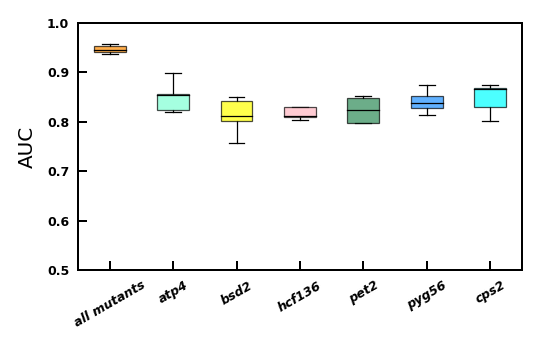

In [41]:
plt.figure(figsize=(7,4),dpi=180)
box_1, box_2, box_3, box_4, box_5, box_6, box_7 = df_box["all mutants"],df_box['ATP4'], df_box['bsd2'], df_box['hcf136'],df_box["pet2"],df_box["pyg56"],df_box["cps2"]
plt.subplot(224)
plt.tick_params(direction='in')
plt.tick_params(labelsize = 5)
color_list = ["darkorange","aquamarine","yellow","lightpink","seagreen","dodgerblue","cyan"]
medianprops = dict(linestyle='-', linewidth=0.5, color='black')
labels = ['all mutants','atp4','bsd2','hcf136',"pet2","pyg56","cps2"]
bp = plt.boxplot([box_1, box_2, box_3, box_4, box_5, box_6, box_7],notch=False, labels = labels,patch_artist = True,
            boxprops = {'color':'black','linewidth':'0.5'},
            capprops={'color':'black','linewidth':'0.5'},widths=0.5,medianprops=medianprops,whiskerprops={'linewidth':'0.5'},showfliers=False)
[bp['boxes'][i].set(facecolor=color_list[i], alpha=0.7) for i in range(7)]
plt.xticks(fontproperties = 'Times New Roman',fontstyle = "italic",size =5,fontweight = "bold") 
plt.yticks(fontproperties = 'Times New Roman',size =5,fontweight = "bold") 
plt.xticks(rotation=30)
plt.ylabel('AUC',fontsize=8)
plt.ylim((0.5, 1))